## Importing the Essentials

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('heart_disease.csv')

In [5]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [6]:
df.rename(columns = (lambda x : x.replace(' ','_')) ,inplace=True)

In [7]:
print(df.shape)
print(df.info())

(10000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood_Pressure        9981 non-null   float64
 3   Cholesterol_Level     9970 non-null   float64
 4   Exercise_Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family_Heart_Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High_Blood_Pressure   9974 non-null   object 
 10  Low_HDL_Cholesterol   9975 non-null   object 
 11  High_LDL_Cholesterol  9974 non-null   object 
 12  Alcohol_Consumption   7414 non-null   object 
 13  Stress_Level          9978 non-null   object 
 14  Sleep_Hours           9975 non-null   float64
 15  Sugar_Co

In [8]:
print(df.isnull().sum())
print(df.duplicated())

Age                       29
Gender                    19
Blood_Pressure            19
Cholesterol_Level         30
Exercise_Habits           25
Smoking                   25
Family_Heart_Disease      21
Diabetes                  30
BMI                       22
High_Blood_Pressure       26
Low_HDL_Cholesterol       25
High_LDL_Cholesterol      26
Alcohol_Consumption     2586
Stress_Level              22
Sleep_Hours               25
Sugar_Consumption         30
Triglyceride_Level        26
Fasting_Blood_Sugar       22
CRP_Level                 26
Homocysteine_Level        20
Heart_Disease_Status       0
dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


Many data are missing almost all the cols

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9971.0,49.296259,18.193970,18.000000,34.000000,49.000000,65.000000,80.000000
Blood_Pressure,9981.0,149.757740,17.572969,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol_Level,9970.0,225.425577,43.575809,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,9978.0,29.077269,6.307098,18.002837,23.658075,29.079492,34.520015,39.996954
Sleep_Hours,9975.0,6.991329,1.753195,4.000605,5.449866,7.003252,8.531577,9.999952
Triglyceride_Level,9974.0,250.734409,87.067226,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting_Blood_Sugar,9978.0,120.142213,23.584011,80.000000,99.000000,120.000000,141.000000,160.000000
CRP_Level,9974.0,7.472201,4.340248,0.003647,3.674126,7.472164,11.255592,14.997087
Homocysteine_Level,9980.0,12.456271,4.323426,5.000236,8.723334,12.409395,16.140564,19.999037


No visible outliers

In [10]:
df.head()

,Age,Gender,Blood_Pressure,Cholesterol_Level,Exercise_Habits,Smoking,Family_Heart_Disease,Diabetes,BMI,High_Blood_Pressure,...,High_LDL_Cholesterol,Alcohol_Consumption,Stress_Level,Sleep_Hours,Sugar_Consumption,Triglyceride_Level,Fasting_Blood_Sugar,CRP_Level,Homocysteine_Level,Heart_Disease_Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


### Cheking for any type of unusual type of data

In [11]:
for col in df:
    print(f'{col} : {df[col].unique()}')
    print('-'* 50)

Age : [56. 69. 46. 32. 60. 25. 78. 38. 75. 36. 40. 28. 41. 70. 53. 57. 20. 39.
 19. 61. 47. 55. 77. 50. 29. 42. 66. 44. 76. 80. 59. 45. 33. 79. 64. 68.
 72. 74. 54. 24. 26. 35. 21. 31. 67. 43. 37. 52. 34. 23. 71. 51. 27. 48.
 65. 62. 58. 18. 22. 30. 49. 73. 63. nan]
--------------------------------------------------
Gender : ['Male' 'Female' nan]
--------------------------------------------------
Blood_Pressure : [153. 146. 126. 122. 166. 152. 121. 161. 135. 144. 179. 134. 143. 150.
 133. 173. 125. 136. 137. 139. 170. 159. 158. 171. 151. 163. 128. 165.
 129. 168. 155. 142. 127. 132. 176. 141. 160. 154. 164. 138. 149. 178.
 140. 147.  nan 175. 162. 157. 174. 123. 145. 124. 148. 169. 172. 167.
 131. 120. 177. 130. 180. 156.]
--------------------------------------------------
Cholesterol_Level : [155. 286. 216. 293. 242. 257. 175. 187. 291. 252. 191. 296. 215. 290.
 255. 245. 219. 246. 268. 300. 223. 206. 259. 228. 185. 278. 152. 163.
 183. 218. 253. 178. 197. 243. 266. 287. 281. 224. 177


no visible annomalies in the data except the nan

## EDA

In [12]:
df.columns

Index(['Age', 'Gender', 'Blood_Pressure', 'Cholesterol_Level',
       'Exercise_Habits', 'Smoking', 'Family_Heart_Disease', 'Diabetes', 'BMI',
       'High_Blood_Pressure', 'Low_HDL_Cholesterol', 'High_LDL_Cholesterol',
       'Alcohol_Consumption', 'Stress_Level', 'Sleep_Hours',
       'Sugar_Consumption', 'Triglyceride_Level', 'Fasting_Blood_Sugar',
       'CRP_Level', 'Homocysteine_Level', 'Heart_Disease_Status'],
      dtype='object')

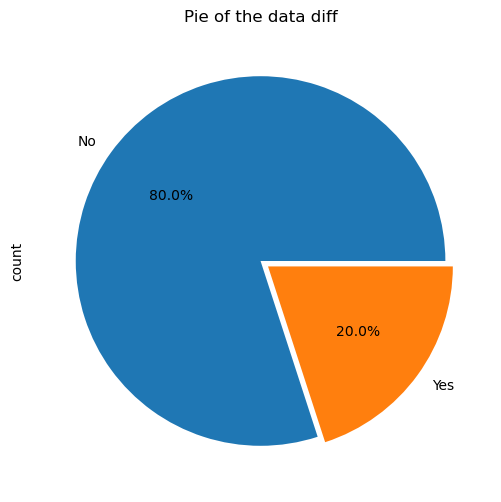

In [39]:
plt.figure(figsize=(8,6))
df['Heart_Disease_Status'].value_counts().plot.pie(autopct = '%1.1f%%', explode = [0, 0.05]).set_title("Pie of the data diff")
plt.show()

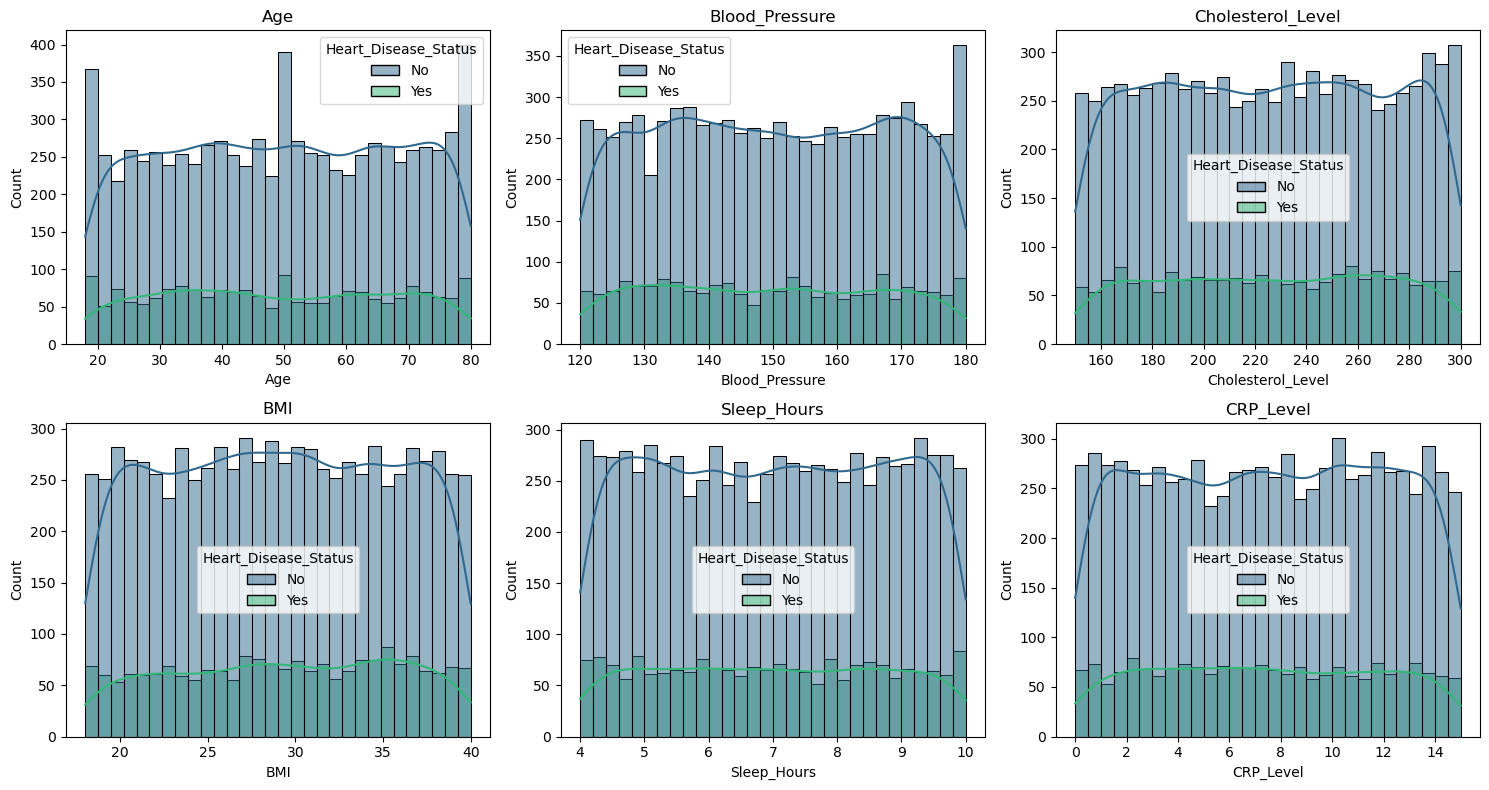

In [31]:
mono_eda = ['Age', 'Blood_Pressure', 'Cholesterol_Level', 'BMI', 'Sleep_Hours', 'CRP_Level']

fig, axes = plt.subplots(2,3, figsize=(15,8))
axes = axes.flatten()
for i, item in enumerate(mono_eda):
    sns.histplot(x= item , kde = True , palette='viridis' , data =df, ax = axes[i], bins = 30, hue= 'Heart_Disease_Status')
    axes[i].set_title(item)
plt.tight_layout()
plt.show()

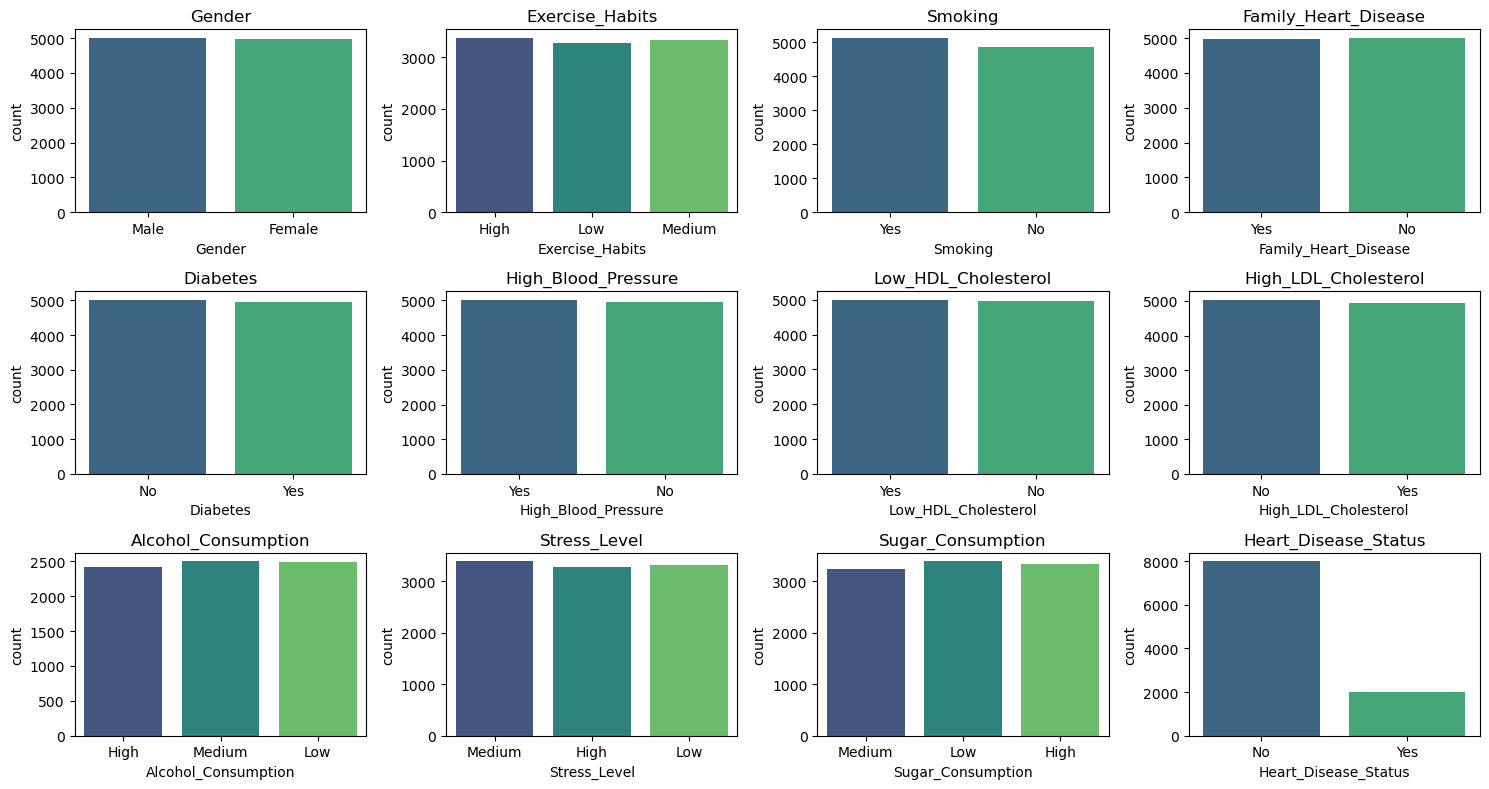

In [38]:
mono_eda_class = ['Gender', 'Exercise_Habits', 'Smoking', 'Family_Heart_Disease',
       'Diabetes', 'High_Blood_Pressure', 'Low_HDL_Cholesterol',
       'High_LDL_Cholesterol', 'Alcohol_Consumption', 'Stress_Level',
       'Sugar_Consumption', 'Heart_Disease_Status']
fig, axes = plt.subplots(3,4, figsize=(15,8))
axes = axes.flatten()
for i, item in enumerate(mono_eda_class):
    sns.countplot(x= item, palette='viridis' , data =df, ax = axes[i])
    axes[i].set_title(item)
plt.tight_layout()
plt.show()